In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling_kaggle.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8693,8694,15659092,Davide,621,France,Female,50,5,0.00,2,1,0,191756.54,1
6221,6222,15603554,Berkeley,513,France,Female,45,0,164649.52,3,1,0,49915.52,1
8947,8948,15674110,Walton,701,France,Female,43,2,160416.56,1,0,1,37266.43,0
7741,7742,15634501,Wei,441,France,Male,60,1,140614.15,1,0,1,174381.23,0
9965,9966,15690164,Shao,627,Germany,Female,33,4,83199.05,1,0,0,159334.93,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df['Geography'].unique

<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [7]:
#First of all, drop 'RowNumber', 'CustomerId', 'Surname','Geography' column as it is of no use

df.drop(labels=['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis='columns', inplace=True)


In [8]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.shape

(10000, 10)

In [10]:
df = df.drop_duplicates()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 859.4+ KB


In [12]:
for column in df:
    print(f'{column} : {df[column].dtype==object}')

CreditScore : False
Gender : True
Age : False
Tenure : False
Balance : False
NumOfProducts : False
HasCrCard : False
IsActiveMember : False
EstimatedSalary : False
Exited : False


In [13]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [14]:
print_unique_col_values(df)        # gender column will be object

Gender: ['Female' 'Male']


In [15]:
df['Gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [16]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


# data visualization

In [17]:
gender_churn_yes = df[df.Exited == 1].Gender 
gender_churn_no = df[df.Exited == 0].Gender 


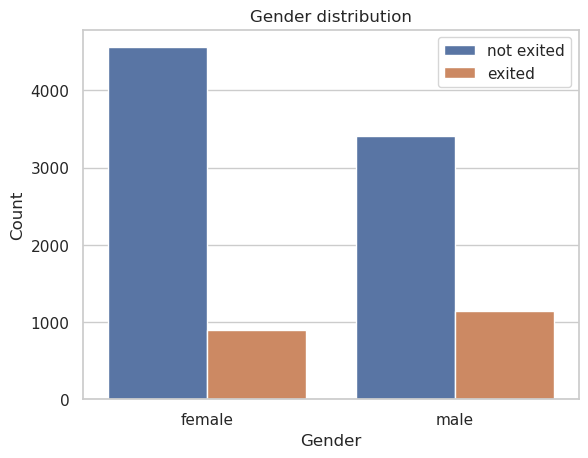

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.countplot(x='Gender', hue='Exited', data=df)
# plt.hist([gender_churn_yes, gender_churn_no], label=['exited', 'not exited'])

ax.set_title('Gender distribution') 
ax.set_xlabel('Gender') 
ax.set_ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['male', 'female'])
plt.legend(labels=['not exited', 'exited'])
plt.show()

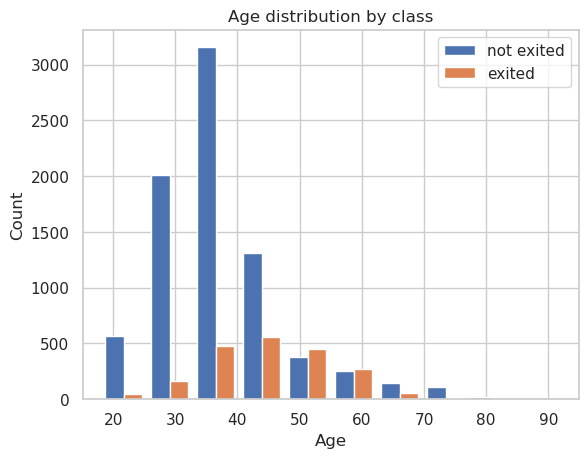

In [19]:
#More number of female customers are choose to exit, and more number of male customers choose not to exit or close the bank account

age_churn_yes = df[df.Exited == 1].Age 
age_churn_no = df[df.Exited == 0].Age 

plt.hist([age_churn_no, age_churn_yes], label=['not exited', 'exited'])
plt.xlabel('Age')
plt.ylabel('Count') 
plt.title('Age distribution by class')
plt.legend()
plt.show()

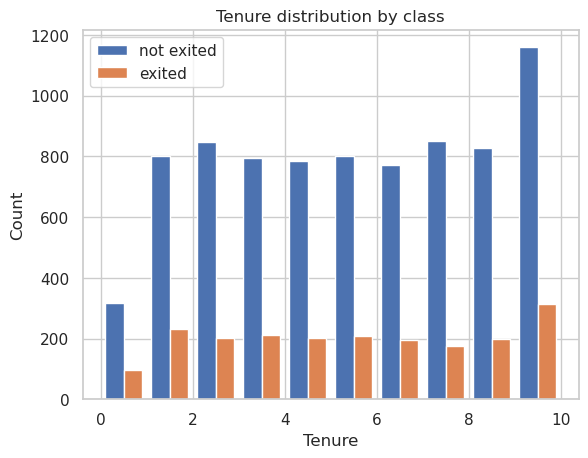

In [20]:
# Most of the customers whose age is between 50 and 60 inclusive are going to exit in more number than stay

tenure_churn_yes = df[df.Exited == 1].Tenure 
tenure_churn_no = df[df.Exited == 0].Tenure 

plt.hist([tenure_churn_no, tenure_churn_yes], label=['not exited', 'exited'])
plt.xlabel('Tenure')
plt.ylabel('Count') 
plt.title('Tenure distribution by class')
plt.legend()
plt.show()

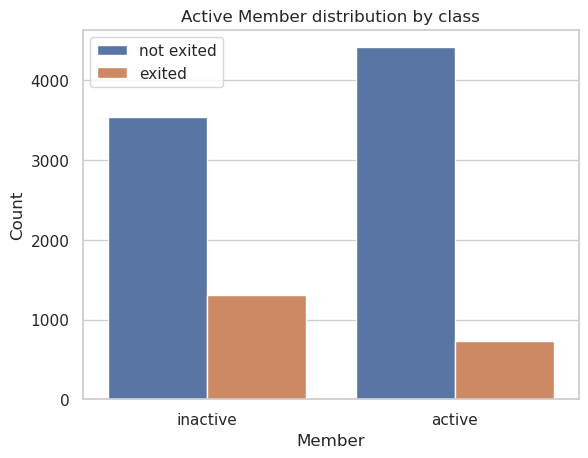

In [21]:
active_member_churn_yes = df[df.Exited == 1].IsActiveMember        
active_member_churn_no = df[df.Exited == 0].IsActiveMember        

sns.countplot(x='IsActiveMember', hue='Exited', data=df)
# plt.hist([active_member_churn_yes, active_member_churn_no], label=['exited', 'not exited'])
plt.xlabel('Member')
plt.ylabel('Count') 
plt.title('Active Member distribution by class')
plt.xticks(ticks=[0, 1], labels=['inactive', 'active'])
plt.legend(labels=['not exited', 'exited'])
plt.show()

In [22]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
# to perform standard scalling menthod to makes hugher values as 0's and 1's

from sklearn.preprocessing import MinMaxScaler 

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] 

df[cols_to_scale] = MinMaxScaler().fit_transform(df[cols_to_scale]) 

df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2133,0.676,1,0.189189,0.6,0.490868,0.000000,1,0,0.862681,0
2905,0.660,0,0.189189,0.7,0.699304,0.000000,0,1,0.386729,0
7461,0.492,0,0.189189,0.4,0.000000,0.333333,0,1,0.732534,0
2541,0.522,1,0.581081,0.3,0.524450,1.000000,0,1,0.331165,1
4939,0.532,0,0.256757,0.5,0.574878,0.333333,0,0,0.774804,1


In [24]:
for col in df:
    print(f'{col}: {df[col].unique()}')          #formate string 

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [25]:
#Train test split

X = df.drop('Exited', axis=1)
y = df.Exited

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [27]:
X_train.shape,X_test.shape

((8000, 9), (2000, 9))

In [28]:
!pip install tensorflow

# after training to perform ANN-artiifcial neural network function

In [29]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(9,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=10,               # Stop training after 10 epochs with no improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping]
)


2025-01-27 07:42:54.221084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737963774.246184    6158 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737963774.253425    6158 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 07:42:54.276673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5754 - loss: 0.6823 - val_accuracy: 0.8087 - val_loss: 0.5049
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.5131 - val_accuracy: 0.8087 - val_loss: 0.4779
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4934 - val_accuracy: 0.8087 - val_loss: 0.4676
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.4849 - val_accuracy: 0.8087 - val_loss: 0.4563
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4826 - val_accuracy: 0.8156 - val_loss: 0.4441
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7948 - loss: 0.4673 - val_accuracy: 0.8213 - val_loss: 0.4373
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4637 - val_accuracy: 0.8225 - val_loss: 0.4323
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8120 - loss: 0.4396 - val_accu

In [30]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3666  


[0.36331918835639954, 0.8504999876022339]

In [31]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [32]:
y_pred[:5]                   # the predictions are in 2D dimension we have to convert into 1D

array([[0.02459056],
       [0.08432678],
       [0.10562541],
       [0.10365473],
       [0.09171768]], dtype=float32)

In [33]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [37]:
y_prediction = []  # Initialize y_pred as a list

for element in y_pred:       # Assuming predictions is iterable
    if element > 0.5:  # Replace 'threshold' with your comparison value
        y_prediction.append(1)
    else:
       y_prediction.append(0)


In [39]:
y_prediction[:10] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Text(91.25, 0.5, 'Truth')

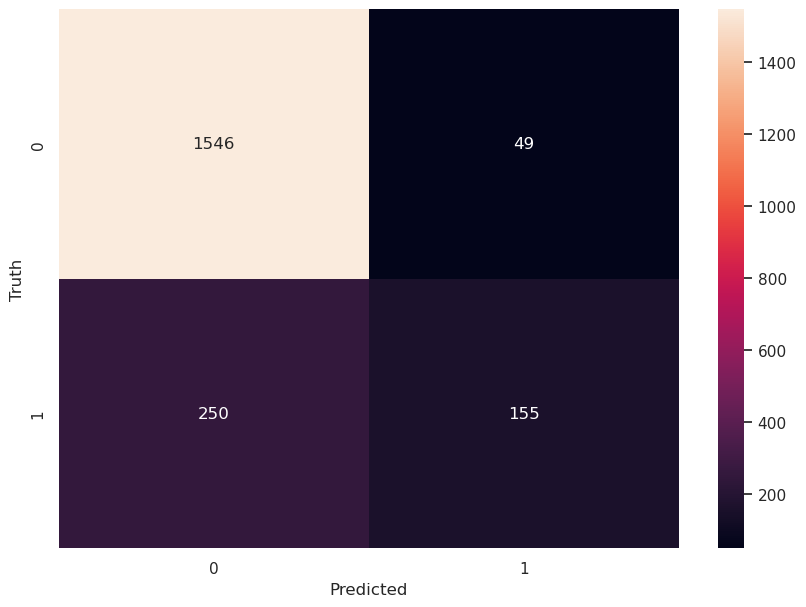

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
y_test.shape

(2000,)

In [43]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_prediction))    #Even accuracy is good, but f1 score is too bad for class-1, Imbalance is also one major reason

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.76      0.38      0.51       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000

